# Explore here

In [73]:
# Your code here

import pandas as pd

df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")

In [74]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [75]:
df.to_csv('../data/raw/datos_crudos.csv')

In [76]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [77]:
df.duplicated().sum()

np.int64(1)

In [78]:
# yo creo que la unica variable que no es relevante es la region pero para estar segurios vamos a analizarla con mas detalle

In [79]:
# analisis de variables univariantes 

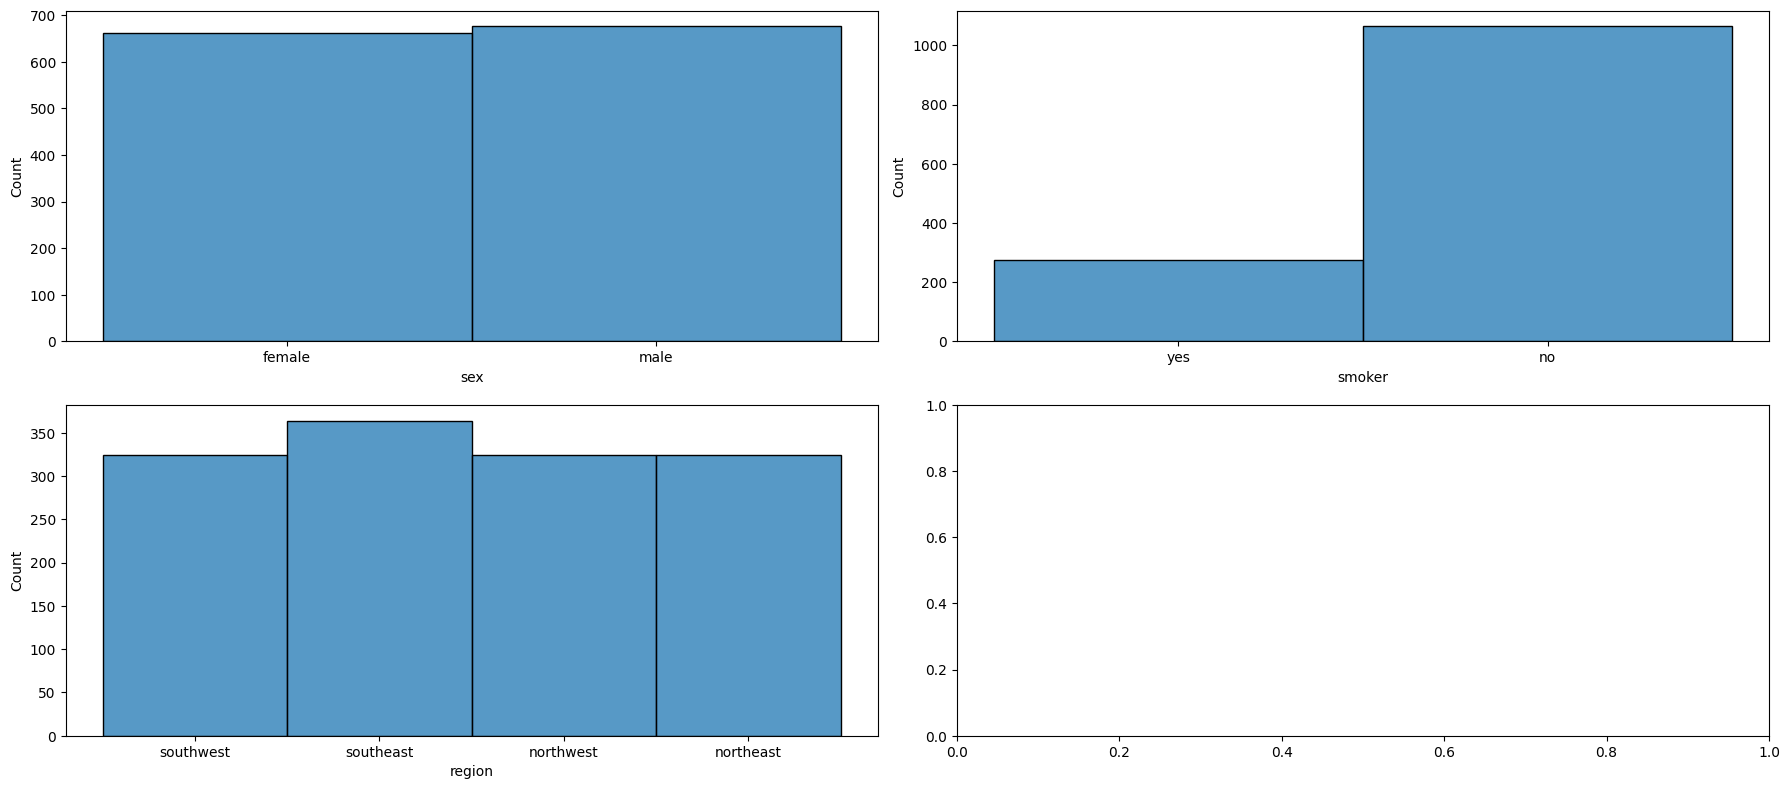

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns 

#analisis de variables categoricas 

fig, axis = plt.subplots(2, 2, figsize=(18, 8))

sns.histplot(ax=axis[0,0], data=df, x='sex') 
sns.histplot(ax=axis[0,1], data=df, x='smoker')
sns.histplot(ax=axis[1,0], data=df, x='region')


plt.tight_layout()
plt.show()

In [81]:
# podemos ver que los clientes son practicamente iguales en cuanto a su sexo, pero la mayoria de los clientes no son fumadores y la mayoria de los clientes viven en el sureste

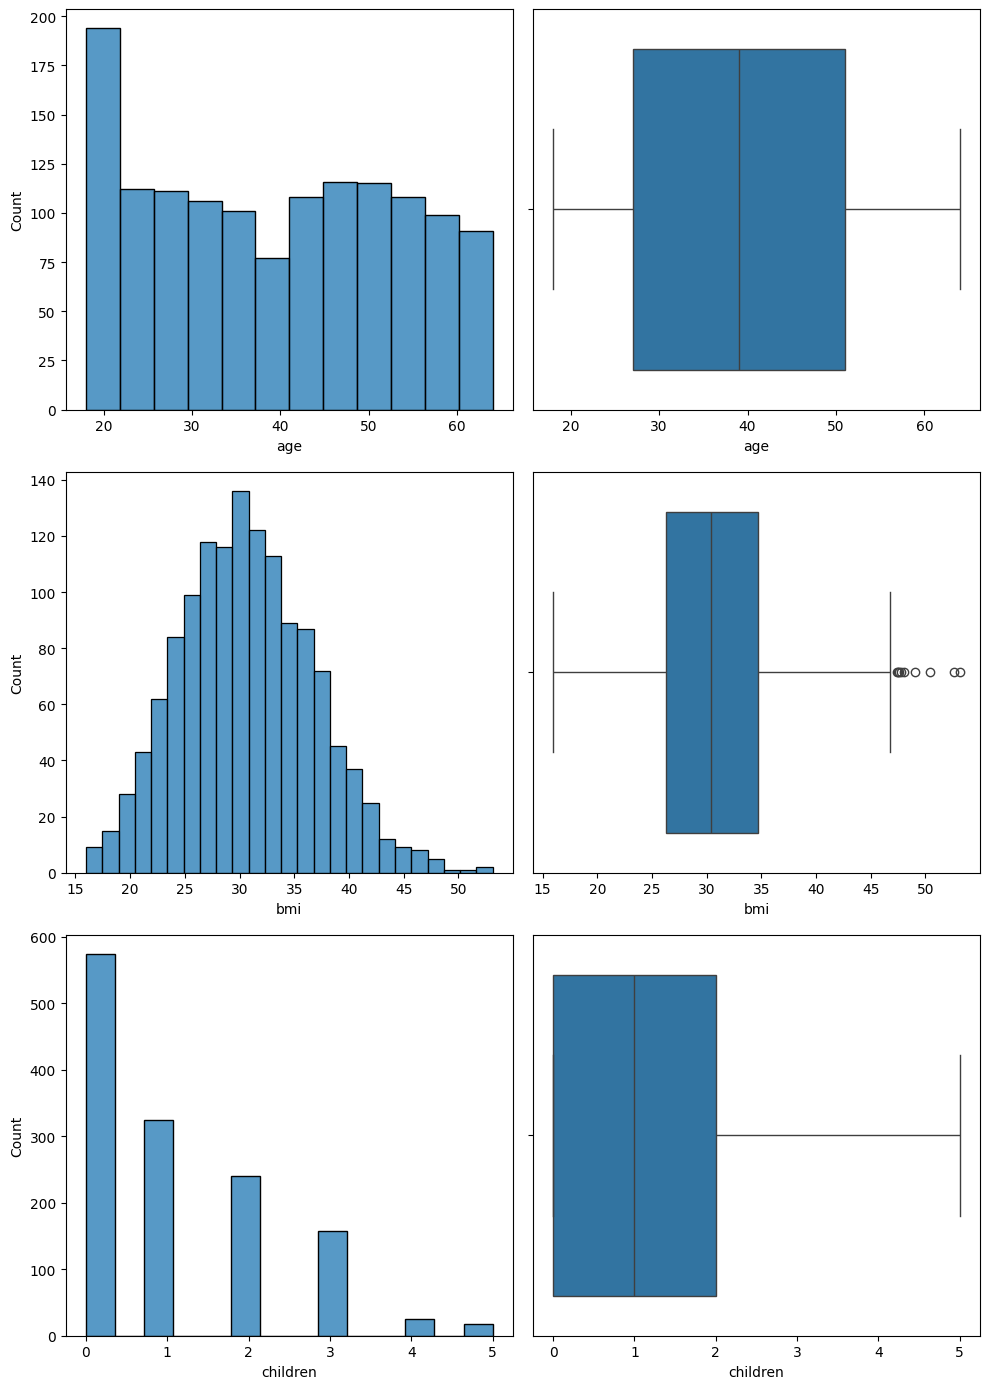

In [82]:
# analisis de variables numericas 

fig, axis = plt.subplots(3, 2, figsize=(10, 14))

sns.histplot(ax=axis[0,0], data=df, x='age') 
sns.boxplot(ax=axis[0,1], data=df, x='age') 
sns.histplot(ax=axis[1,0], data=df, x='bmi') 
sns.boxplot(ax=axis[1,1], data=df, x='bmi') 
sns.histplot(ax=axis[2,0], data=df, x='children') 
sns.boxplot(ax=axis[2,1], data=df, x='children') 


plt.tight_layout()

In [83]:
# podemos ver   que la edad que sobresale es 20 años pero a pesar de eso la distribucion de edades es. bastante uniforme 
# con la bmi podemos ver que tiene una distriucion de campana pero con algunos outliers 
# podemos ver qye la mayoria de los clientes no tienen hijos y los que si tienen la mayoria tienen entre 1 y 2 conformando el 75% de los 
# clientes mientras que el 25% restante tiene de 3 a 5 hijos.

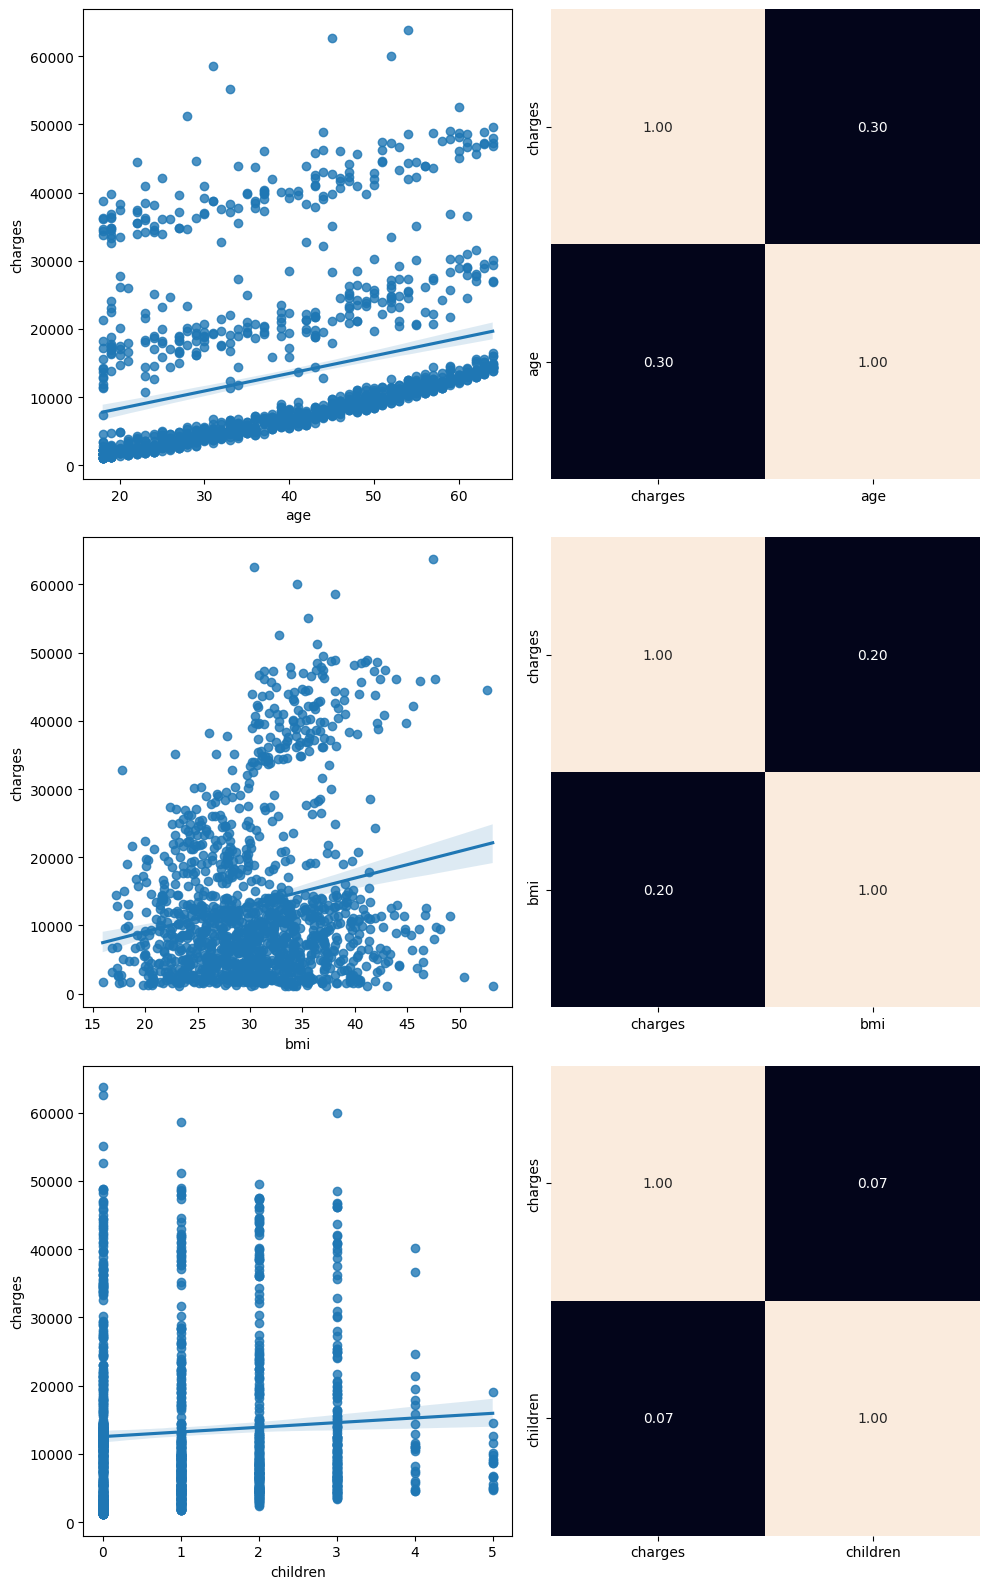

In [84]:
# variables multivariantes 
# numercicos - numericos

fig, axis = plt.subplots(3,2 , figsize=(10, 16))

sns.regplot(ax=axis[0,0], data=df, x="age", y="charges")
sns.heatmap(df[["charges", "age" ]].corr(), annot=True, fmt =".2f", ax=axis[0,1], cbar=False)

sns.regplot(ax=axis[1,0], data=df, x="bmi", y="charges")
sns.heatmap(df[["charges", "bmi" ]].corr(), annot=True, fmt =".2f", ax=axis[1,1], cbar=False)

sns.regplot(ax=axis[2,0], data=df, x="children", y="charges")
sns.heatmap(df[["charges", "children" ]].corr(), annot=True, fmt =".2f", ax=axis[2,1], cbar=False)


plt.tight_layout()
plt.show()


In [85]:
# podemos ver que la edad y el precio del seguro si estan relacionadas de una manera posotiva pero al mismo tiempo vemos que la correlacion es de 0.3 lo que significa 
# que hay más variables que afectan el precio 

# la variable bmi si tiene une relacion con el precio pero aun menor que la del la edad teniendo un 0.2 y los datos se concentran entre 20 y 40

# la relacion entre hijos y el precio es minima con un 0.07 y lo podemos ver claramente en la grafica por lo que podemos concluir que una persona mayor de edad con 3 hijos o más y un
# alto bmi va a tener un precio alto en su seguero 

<Axes: xlabel='region', ylabel='charges'>

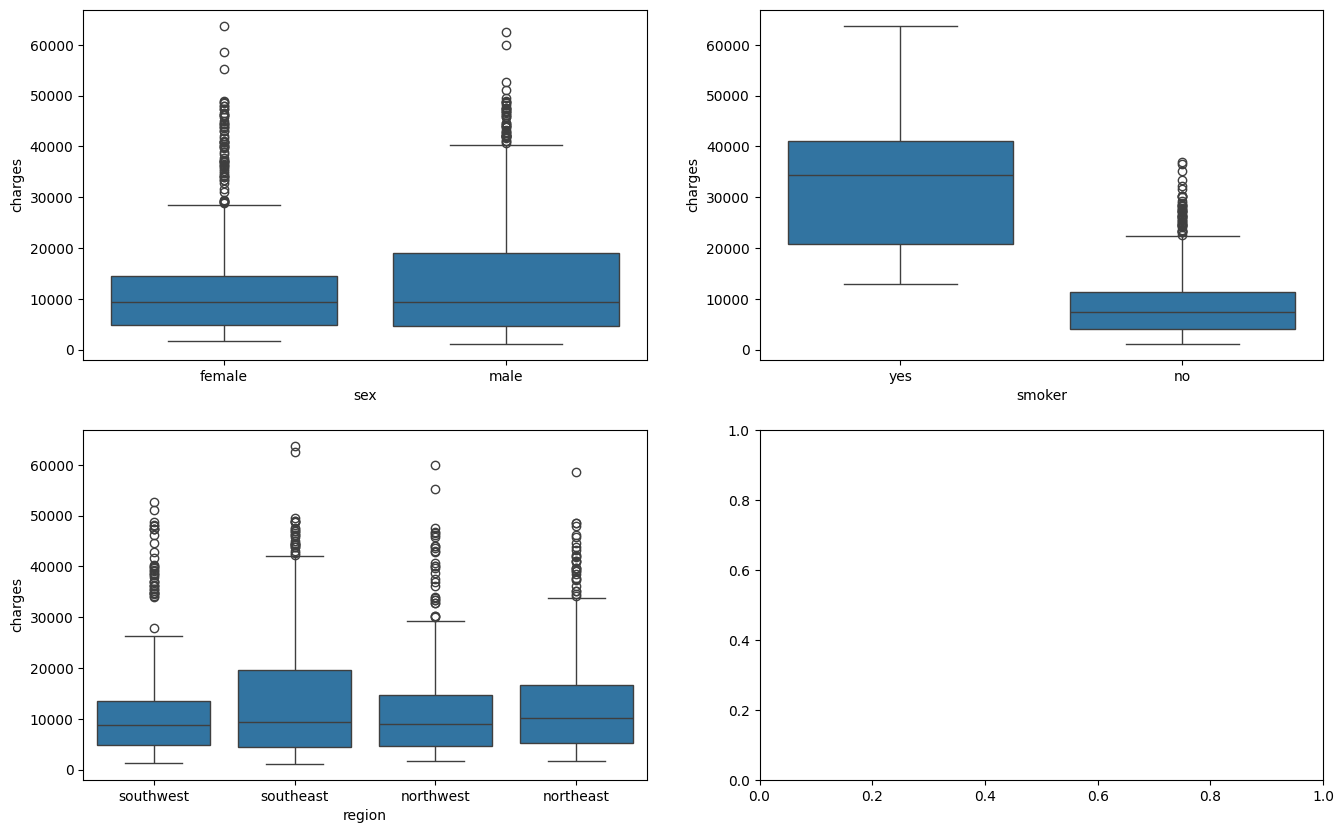

In [86]:

fig, axis = plt.subplots(2,2, figsize=(16,10))

sns.boxplot(data=df, x='sex', y='charges', ax=axis[0,0])
sns.boxplot(data=df, x='smoker', y='charges', ax=axis[0,1])
sns.boxplot(data=df, x='region', y='charges', ax=axis[1,0])

In [87]:
# podemos ver que la variable sex tiene una relacion fueerte con charges, mientras que el 50% de los hombres tienen el mismo costo que el 
# 50% de las mujeres, el otro 50% ya tiene una gran diferencia comparad con las mujeres pero tambien podemos ver que las mujeres tienen más 
# outliers

# en cuanto a la variable de fumadores como era de esperarse el ser fumador incrementa el costo significantemente, asimismo vemos que hay muchos 
# outliers para no fumadores, lo que podrían ser personas con alguna otra condicion medica 

# en cuanto a region se ve que la media es practicamente igual pero la distribucion es muy diferente por lo que si a vamos a tomar en cuenta 

In [88]:
# analizando las graficas anteriores podemos ver que los unicos outliers estan en bmi y en charges

<Axes: xlabel='bmi'>

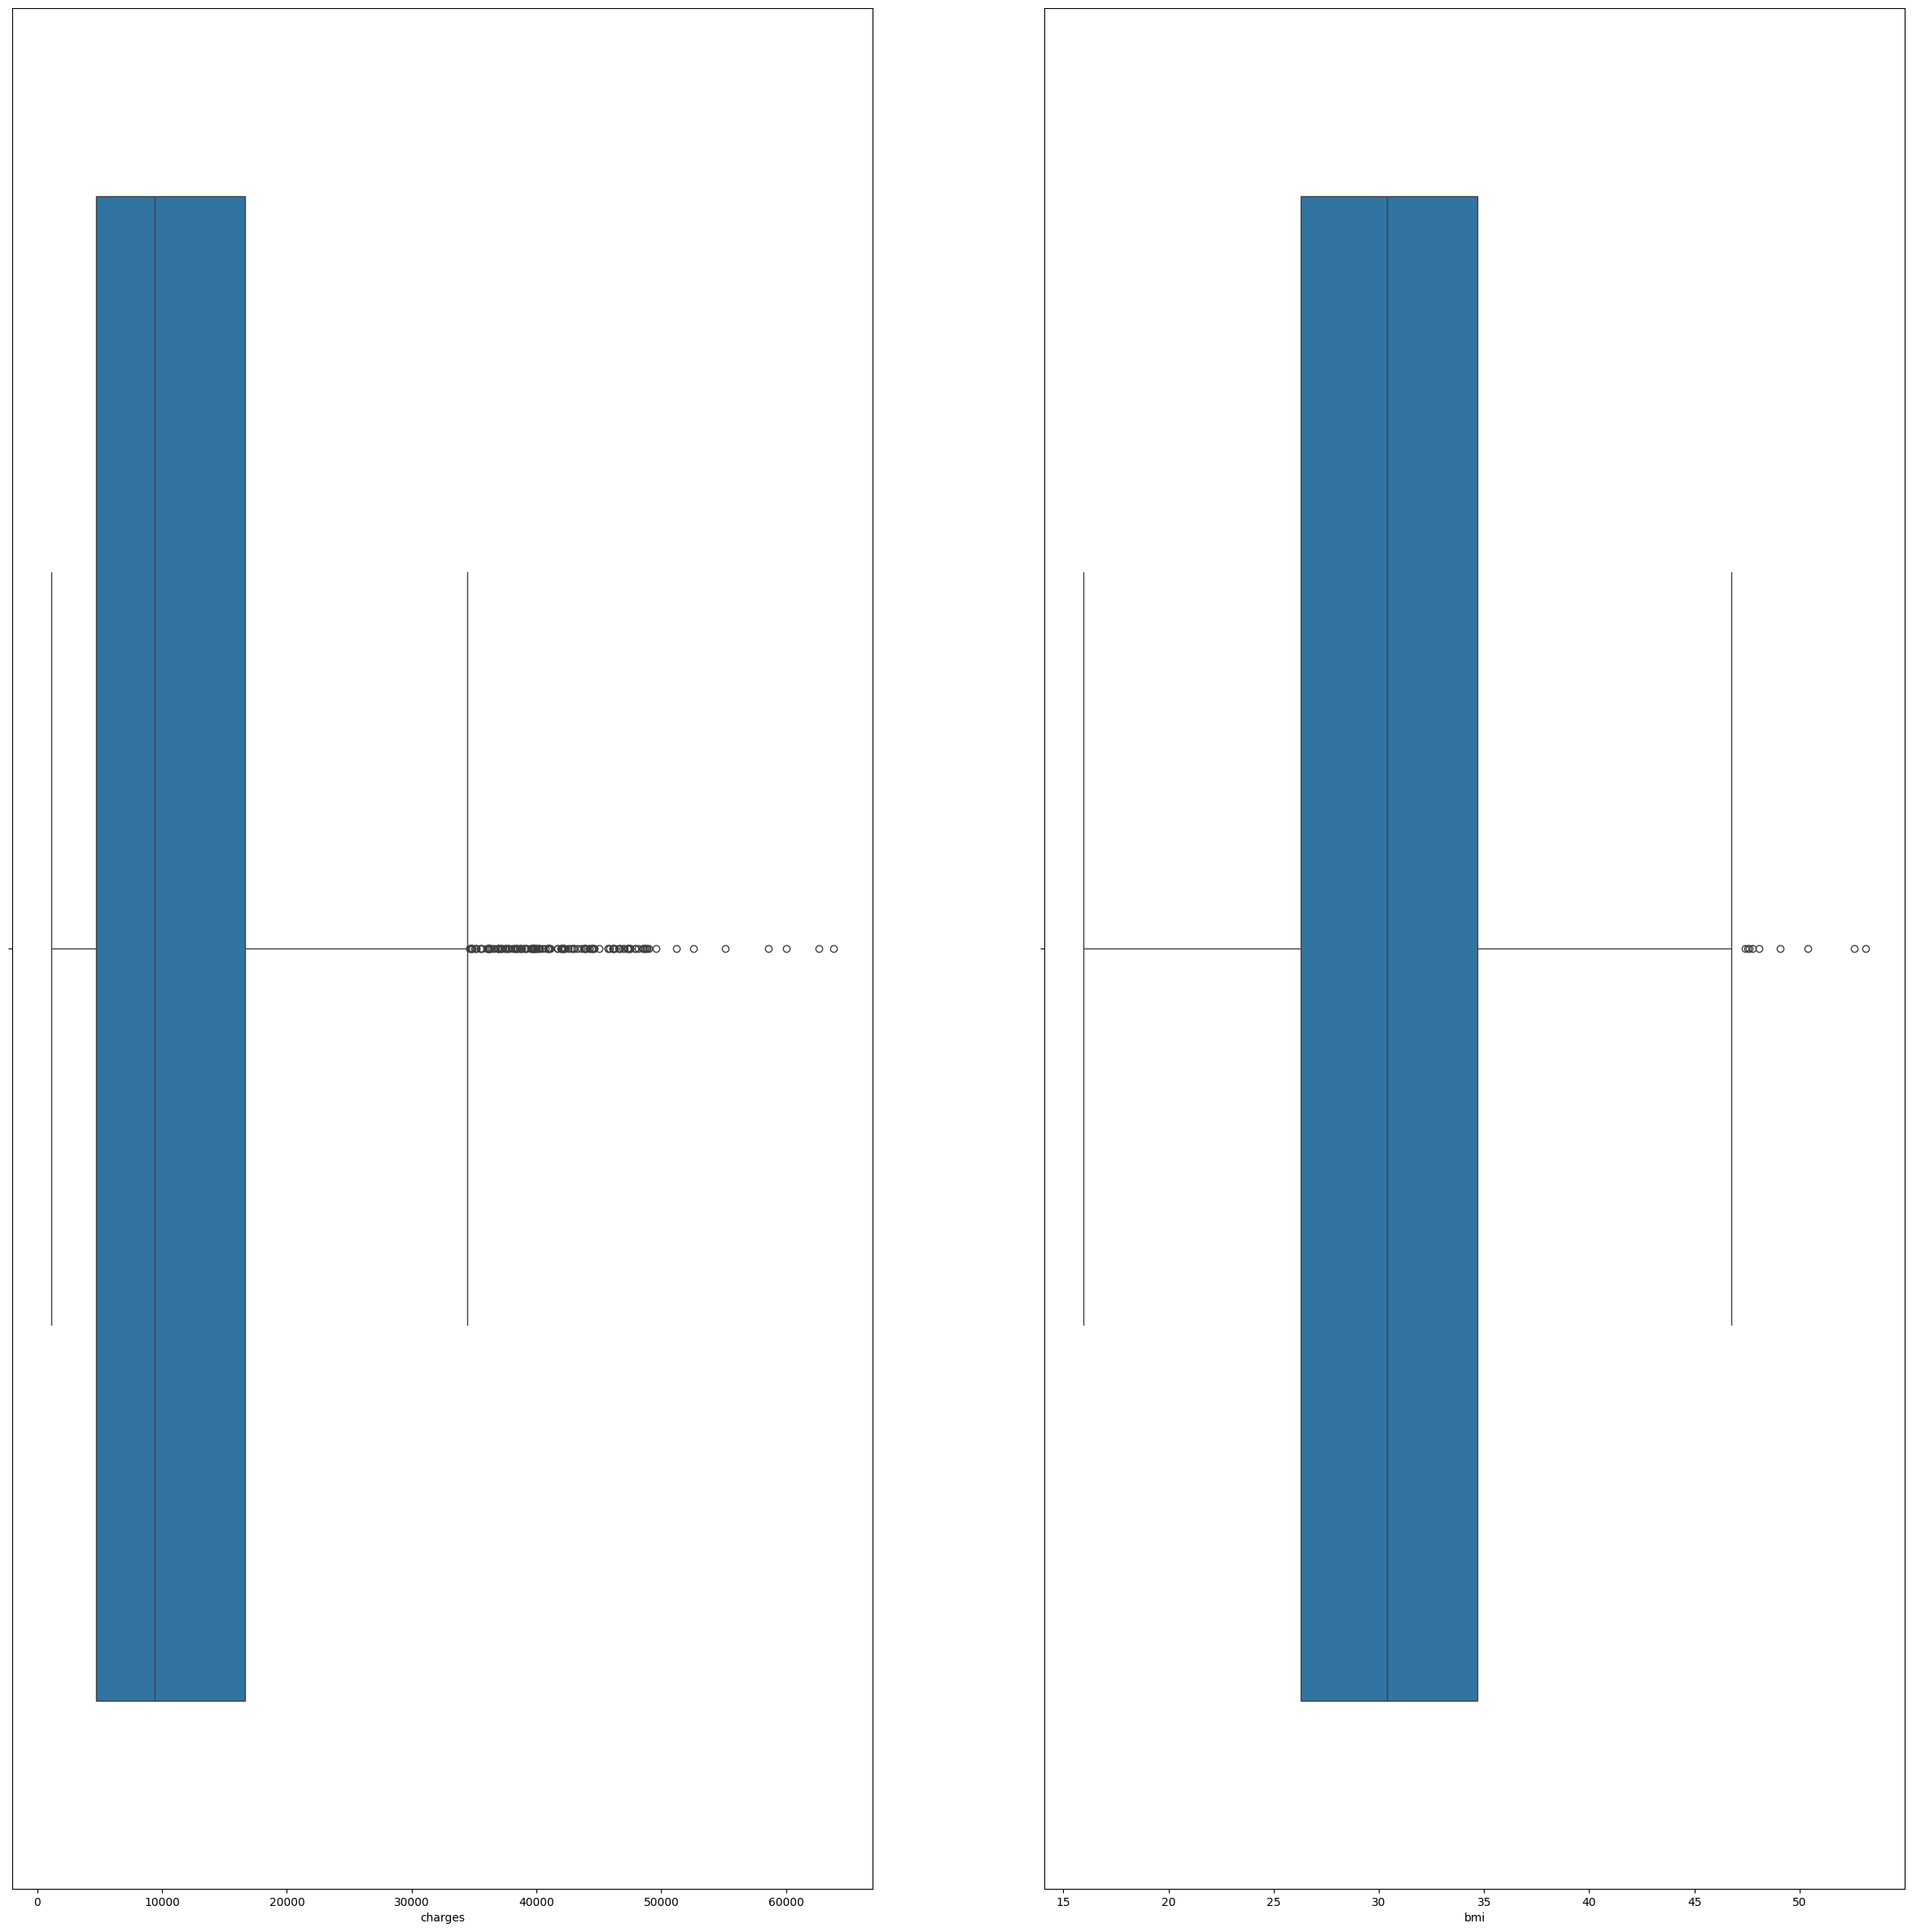

In [89]:
fig, axis = plt.subplots(1,2, figsize=(30,30))

sns.boxplot(ax=axis[0], data=df, x="charges")
sns.boxplot(ax=axis[1], data=df, x="bmi")

In [90]:
q1 = df["charges"].quantile(0.25)
q3 = df["charges"].quantile(0.75)
iqr = q3-q1

low=q1-1.5*iqr
high=q3+1.5*iqr

In [91]:
outliers_df = df[(df["charges"] < low) | (df["charges"] > high)].copy()

print("N outliers:", len(outliers_df))
display(outliers_df.sort_values("charges", ascending=False).head(20))

N outliers: 139


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [92]:
# de los primeros outliers de charges podemos ver que la todos son fumadores, estan arriba 
# del promedio de bmi y estan en el grupo de edad de 51-64 años, vamos a ver de todos los outliers cuantos cumplen con esta caracteristica y 
# representa un 10% de los datos totales 

In [93]:
# los outliers de bmi los vamos a mantener ya que son pocos y posibles 

In [94]:
filtro1 = (
    (outliers_df["smoker"] == "yes"))

print(filtro1.sum())  
    

136


In [95]:
# con esto podemos ver que los outliers se deben a que la persona fuma, y nos demuestra que la variable smoker es la que tiene mayor impacto
# en charges

In [96]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
#division de datos

from sklearn.model_selection import train_test_split

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

X = df.drop("charges", axis = 1)[num_variables]
Y = df["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
num_cols = X_train.select_dtypes(exclude=['object', 'category']).columns

pre = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

X_train = pre.fit_transform(X_train)
X_test = pre.transform(X_test)

/tmp/ipykernel_716/491845121.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train.select_dtypes(include=['object', 'category']).columns


In [99]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

mejor_k = 1
mejor_rmse = float("inf")

for k in range(1, X_train.shape[1] + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    Xk = selector.fit_transform(X_train, Y_train)

    modelo = LinearRegression()
    scores = cross_val_score(
        modelo, Xk, Y_train, cv=5, scoring="neg_mean_squared_error"
    )
    rmse = np.sqrt(-scores.mean())

    if rmse < mejor_rmse:
        mejor_rmse = rmse
        mejor_k = k

print("Mejor k:", mejor_k)
print("RMSE CV:", round(mejor_rmse, 2))


Mejor k: 4
RMSE CV: 6140.51


In [100]:
type(X_train), type(X_test)

(numpy.ndarray, numpy.ndarray)

In [101]:
import pandas as pd

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

X_train_df["y"] = Y_train.values
X_test_df["y"] = Y_test.values

X_train_df.to_csv("clean_seguro_train.csv", index=False)
X_test_df.to_csv("clean_seguro_test.csv", index=False)


In [102]:
import pandas as pd

train_data = pd.read_csv("clean_seguro_train.csv")
test_data = pd.read_csv("clean_seguro_test.csv")

train_data.head()

,0,1,2,3,4,5,6,7,y
0,0.0,0.0,1.0,0.0,0.0,0.472227,-1.756525,0.734336,9193.83850
1,0.0,0.0,0.0,0.0,0.0,0.543313,-1.033082,-0.911192,8534.67180
2,0.0,0.0,0.0,1.0,0.0,0.898745,-0.943687,-0.911192,27117.99378
3,0.0,0.0,0.0,1.0,0.0,-0.025379,0.622393,3.202629,8596.82780
4,0.0,0.0,1.0,0.0,0.0,1.040918,-1.504893,1.557100,12475.35130


In [103]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [104]:
y_pred = model.predict(X_test)
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673494, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303303, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(Y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(Y_test, y_pred)}")

Error cuadrático medio: 33596915.85136133
Coeficiente de determinación: 0.7835929767120732


In [106]:
# podemos ver que el modelo explica aproximadamente 78.36% de los datos 